# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [3]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.cifar10.load_data()


170500096/170498071 [==============================] - 6s 0us/step


In [4]:
trainX.shape

(50000, 32, 32, 3)

In [5]:
trainY.shape

(50000, 1)

Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [0]:
x_train_scaled = np.subtract(trainX, np.min(trainX))/np.subtract(np.max(trainX),np.min(trainX))

In [0]:
x_test_scaled = np.subtract(testX, np.min(testX))/np.subtract(np.max(testX),np.min(testX))

In [0]:
y_train = tf.keras.utils.to_categorical(trainY, num_classes=10)
y_test = tf.keras.utils.to_categorical(testY, num_classes=10)

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
#Importing the Libraries for building ANN model 
from tensorflow.keras.models import Sequential  #For building the Neural Network layer by layer
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Reshape, Flatten #Dense - To randomly initialize the weights to small numbers close to 0(But not 0)
from tensorflow.keras.layers import MaxPool2D, Conv2D
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.backend import backend

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = Sequential()

model.add(Reshape((32,32,3),input_shape=(32,32,3)))

#normalize data
model.add(BatchNormalization())

In [0]:
#Add convolutional layer
model.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))


#Add convolutional layer
model.add(Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))


In [0]:
#Add MaxPooling layer
model.add(MaxPool2D(pool_size=(2,2)))


#Add another dropout layer
model.add(Dropout(0.25))

In [0]:
#Flatten the output
model.add(Flatten())

In [0]:
#Fully Connected Dense layer - 1st
model.add(Dense(100, activation='relu'))

#Dense layer - 2nd
model.add(Dense(100, activation='relu'))

#Dense layer - 3rd
model.add(Dense(10, activation='relu'))

In [0]:
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [32]:
#Train the model
model.fit(x_train_scaled,y_train,          
          validation_data=(x_test_scaled,y_test),
          epochs=10,
          batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 140s 3ms/sample - loss: 1.5567 - acc: 0.4308 - val_loss: 1.1778 - val_acc: 0.5792
Epoch 2/10
50000/50000 [==============================] - 140s 3ms/sample - loss: 1.0806 - acc: 0.6162 - val_loss: 0.9936 - val_acc: 0.6478
Epoch 3/10
50000/50000 [==============================] - 141s 3ms/sample - loss: 0.9049 - acc: 0.6808 - val_loss: 0.9532 - val_acc: 0.6685
Epoch 4/10
50000/50000 [==============================] - 141s 3ms/sample - loss: 0.7901 - acc: 0.7202 - val_loss: 0.9207 - val_acc: 0.6812
Epoch 5/10
50000/50000 [==============================] - 140s 3ms/sample - loss: 0.6993 - acc: 0.7548 - val_loss: 0.9027 - val_acc: 0.6951
Epoch 6/10
50000/50000 [==============================] - 140s 3ms/sample - loss: 0.6214 - acc: 0.7804 - val_loss: 0.9524 - val_acc: 0.6901
Epoch 7/10
50000/50000 [==============================] - 140s 3ms/sample - loss: 0.5608 - acc: 0.7993 - val_l

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 3)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [36]:
score = model.evaluate(x_test_scaled, y_test, verbose=0)
print(score)

[1.0495684280872346, 0.694]


Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img,img_to_array

Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Internal Lab 8/')

In [0]:
import zipfile
with zipfile.ZipFile("images.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [0]:
img = load_img('images/49436743043_2441587ab9_c.jpg')


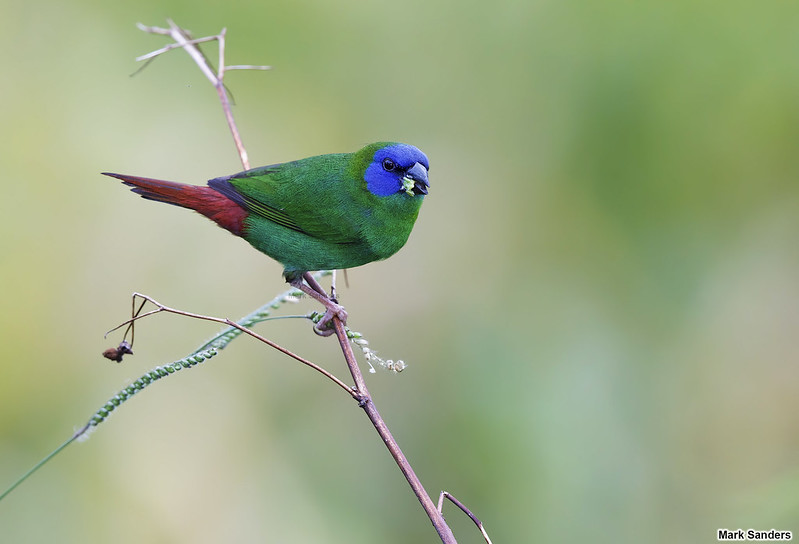

In [51]:
img

In [52]:
img.size

(799, 544)

Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [53]:
#Prepare Input 
#VGG takes 224x224 image
model_input = img.resize((224,224))
model_input = tf.keras.preprocessing.image.img_to_array(model_input)

#Image array should be normalized in same way as was done for VGG training
model_input = tf.keras.applications.vgg16.preprocess_input(model_input)

#Add a dimension to input data to make it a 4D input as required by model
model_input = np.expand_dims(model_input, axis=0)
model_input.shape

(1, 224, 224, 3)

In [54]:
#Load VGG Model
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, #Should we include classification Layers
                                        weights='imagenet', #Load imagenet weights, 'None' will load random weights
                                        input_shape=(224,224,3)) #Input image size

553467904/553467096 [==============================] - 17s 0us/step


In [55]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [56]:
#Predict
prediction = vgg.predict(model_input)
prediction.shape

(1, 1000)

In [57]:
#Prediction Class
np.argmax(prediction[0])

94

In [58]:
decode_predictions(prediction)

40960/35363 [==================================] - 0s 0us/step


[[('n01833805', 'hummingbird', 0.36529148),
  ('n01828970', 'bee_eater', 0.3073224),
  ('n01537544', 'indigo_bunting', 0.11989428),
  ('n01820546', 'lorikeet', 0.02981887),
  ('n02268853', 'damselfly', 0.029289482)]]

In [60]:
print("Predictions : ", decode_predictions(prediction, top=1)[0]) 

Predictions :  [('n01833805', 'hummingbird', 0.36529148)]


#NLP

## Question 1

Read file 'tweets.csv'

In [0]:
import pandas as pd
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [0]:
tweet = pd.read_csv('tweets.csv', encoding="Latin")

In [133]:
tweet.head()

tweet_text  ... is_there_an_emotion_directed_at_a_brand_or_product
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...  ...                                   Negative emotion
1  @jessedee Know about @fludapp ? Awesome iPad/i...  ...                                   Positive emotion
2  @swonderlin Can not wait for #iPad 2 also. The...  ...                                   Positive emotion
3  @sxsw I hope this year's festival isn't as cra...  ...                                   Negative emotion
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...  ...                                   Positive emotion

[5 rows x 3 columns]

In [134]:
tweet.shape

(9093, 3)

**Drop null values**

*   Drop all the rows with null values




In [0]:
tweet.dropna(axis=0, inplace=True)

In [136]:
tweet.shape

(3291, 3)

**Print the dataframe**
*   print initial 5 rows of the data


In [137]:
tweet.head()

tweet_text  ... is_there_an_emotion_directed_at_a_brand_or_product
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...  ...                                   Negative emotion
1  @jessedee Know about @fludapp ? Awesome iPad/i...  ...                                   Positive emotion
2  @swonderlin Can not wait for #iPad 2 also. The...  ...                                   Positive emotion
3  @sxsw I hope this year's festival isn't as cra...  ...                                   Negative emotion
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...  ...                                   Positive emotion

[5 rows x 3 columns]

##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:

tweet['tweet_text'] = tweet['tweet_text'].map(lambda s: re.sub('[^0-9a-z #+_]','',s))
tweet['tweet_text'] = tweet['tweet_text'].map(lambda s: s.lower())



In [0]:
tweet['tweet_text'] = tweet['tweet_text'].map(lambda s: s.strip())


In [103]:
tweet.head()

tweet_text  ... is_there_an_emotion_directed_at_a_brand_or_product
0  wesley83  have a 3 ihone fter 3 hrs tweeting a...  ...                                   Negative emotion
1  jessedee now about fludapp  wesome iadihone ap...  ...                                   Positive emotion
2  swonderlin an not wait for #iad 2 also hey sho...  ...                                   Positive emotion
3  sxsw  hope this years festival isnt as crashy ...  ...                                   Negative emotion
4  sxtxstate great stuff on ri # arissa ayer oogl...  ...                                   Positive emotion

[5 rows x 3 columns]

## Question 3

**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





In [0]:
tweet_df = tweet[(tweet['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion') | (tweet['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion')]

In [106]:
tweet['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [112]:
tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [113]:
tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'] = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product'].map({'Negative emotion':0, 'Positive emotion':1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
tweet_df.head()

tweet_text  ... is_there_an_emotion_directed_at_a_brand_or_product
0  wesley83  have a 3 ihone fter 3 hrs tweeting a...  ...                                                  0
1  jessedee now about fludapp  wesome iadihone ap...  ...                                                  1
2  swonderlin an not wait for #iad 2 also hey sho...  ...                                                  1
3  sxsw  hope this years festival isnt as crashy ...  ...                                                  0
4  sxtxstate great stuff on ri # arissa ayer oogl...  ...                                                  1

[5 rows x 3 columns]

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [115]:
X = tweet_df['tweet_text']
y = tweet_df['is_there_an_emotion_directed_at_a_brand_or_product']
print(X.shape)
print(y.shape)

(3191,)
(3191,)


### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [116]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2393,)
(798,)
(2393,)
(798,)


## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
# instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english',ngram_range=(1, 2), min_df= 2)

In [0]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [119]:
# examine the document-term matrix
X_train_dtm

<2393x5393 sparse matrix of type '<class 'numpy.int64'>'
	with 32894 stored elements in Compressed Sparse Row format>

In [120]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<798x5393 sparse matrix of type '<class 'numpy.int64'>'
	with 9098 stored elements in Compressed Sparse Row format>

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [125]:
# use logistic regression with all features
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_train = logreg.predict(X_train_dtm)
print(metrics.accuracy_score(y_train, y_pred_train))  #Training Accuracy

0.9694943585457585


### Fit the classifer
- fit logistic regression classifier

In [0]:
#Fit and predict done in above step

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [128]:
# use Naive Bayes regression with all features
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_train = nb.predict(X_train_dtm)
print(metrics.accuracy_score(y_train, y_pred_train))  #Training Accuracy

0.9402423735896365


### Fit the classifer
- fit naive bayes classifier

In [0]:
#Fit and predict done in above step

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [126]:
y_pred_class = logreg.predict(X_test_dtm)
y_pred_class

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [129]:
y_pred_class_nb = nb.predict(X_test_dtm)
y_pred_class_nb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [127]:
print(metrics.accuracy_score(y_test, y_pred_class)) # Test Accuracy using Logistic regression classifier

0.87468671679198


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [130]:
print(metrics.accuracy_score(y_test, y_pred_class_nb)) # Test Accuracy using Naive Bayes classifier

0.8671679197994987
